# Robotics ?? 2022/2023: Assignment 1 -  Preference-based Optimization
Deadline: Friday 18th of December 2022 9pm
Marco Maccarini, marco.maccarini@idsia.ch

## About this assignment

In this assignment you will further deepen your understanding of Preference-based optimization.

## Submission instructions

Please write your answers, equations, and code directly in this python notebook.

The final notebook must be named name.lastname.pdf and uploaded to the iCorsi website before the deadline expires.

## How to get help
We encourage you to use the tutorials to ask questions or to discuss exercises with other students.
For further questions you can send an email to marco.maccarini@idsia.ch

## Legend
* $l_1$: very-easy
* $l_2$: easy
* $l_3$: normal

# 1. RBF Functions

## 1.1. Creation of an interpolation function $l_1$
Try to create an interpolation function ables to interpolate points. <br>
For example: <br>
x = [$x_1, x_2, .., x_n$], y = [$y_1, y_2, .., y_n$] <br>
f = interpolation function <br>
Note that $ x \in R , y \in R $ <br>
Hint: **scipy** can help you

## Solution

Scipy provides us a nice library called "interpolate" that have some powerful and easy method thath can we use. <br>
See them in [here](https://docs.scipy.org/doc/scipy/reference/interpolate.html)

In [1]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def func(x):
    return x**2

In [3]:
# tested points
tested_points = [-4,2,6,9]
x = np.array(tested_points)
y = np.array(func(x))

In [4]:
def util_plot(lines=[], scatters=[],text_points =[], title=""):
    # Function to plot functions and points
    fig, ax = plt.subplots()
    for line in lines:
        plt.plot(line[:,0],line[:,1])
    for scatter in scatters:
        plt.scatter(scatter[:,0],scatter[:,1])  
    for text in text_points:
        idx=0
        for p in text:
            plt.text(p[0],p[1]-3, r'$x_{}$'.format(idx))
            idx+=1

    plt.grid()
    ax.set_title(title,fontsize = 14)
    
    plt.show()

In [5]:
f = interpolate.interp1d(x, y,bounds_error=False, fill_value=0)

## 1.2 Plot the function  $l_1$
Try to plot the interpolation function

## Solution

In [6]:
xnew = np.linspace(np.min(x), np.max(x), 100)
ynew = f(xnew)

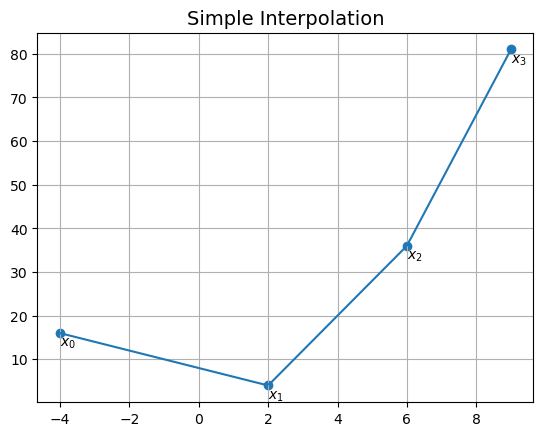

In [7]:
util_plot(lines=[np.column_stack((xnew,ynew))],          
          scatters=[np.column_stack((x,y))],
          text_points = [np.column_stack((x,y))],
          title='Simple Interpolation')

## 1.3  Creation of an RBF interpolation function $l_1$
Same as 1.1 but using RBF function. Test different rbf.

### To recap, a list of RBF function
* multiquadric : $sqrt((r/epsilon)^2 + 1)$
* inverse : $1.0/sqrt((r/epsilon)^2 + 1)$
* gaussian : $exp(-(r/epsilon)^2)$
* linear : $r$
* cubic: $r^3$
* quintic: $r^5$
* thin_plate: $r^2 * log(r)$

## Solution

In [23]:
import numpy as np
from scipy.interpolate import Rbf


x = np.array(tested_points)
y = func(x)

In [24]:
types = ["multiquadric",
        "inverse multiquadric",
        "gaussian",
        "linear",
        "cubic",
        "quintic",
        "thin-plate"     
        ]

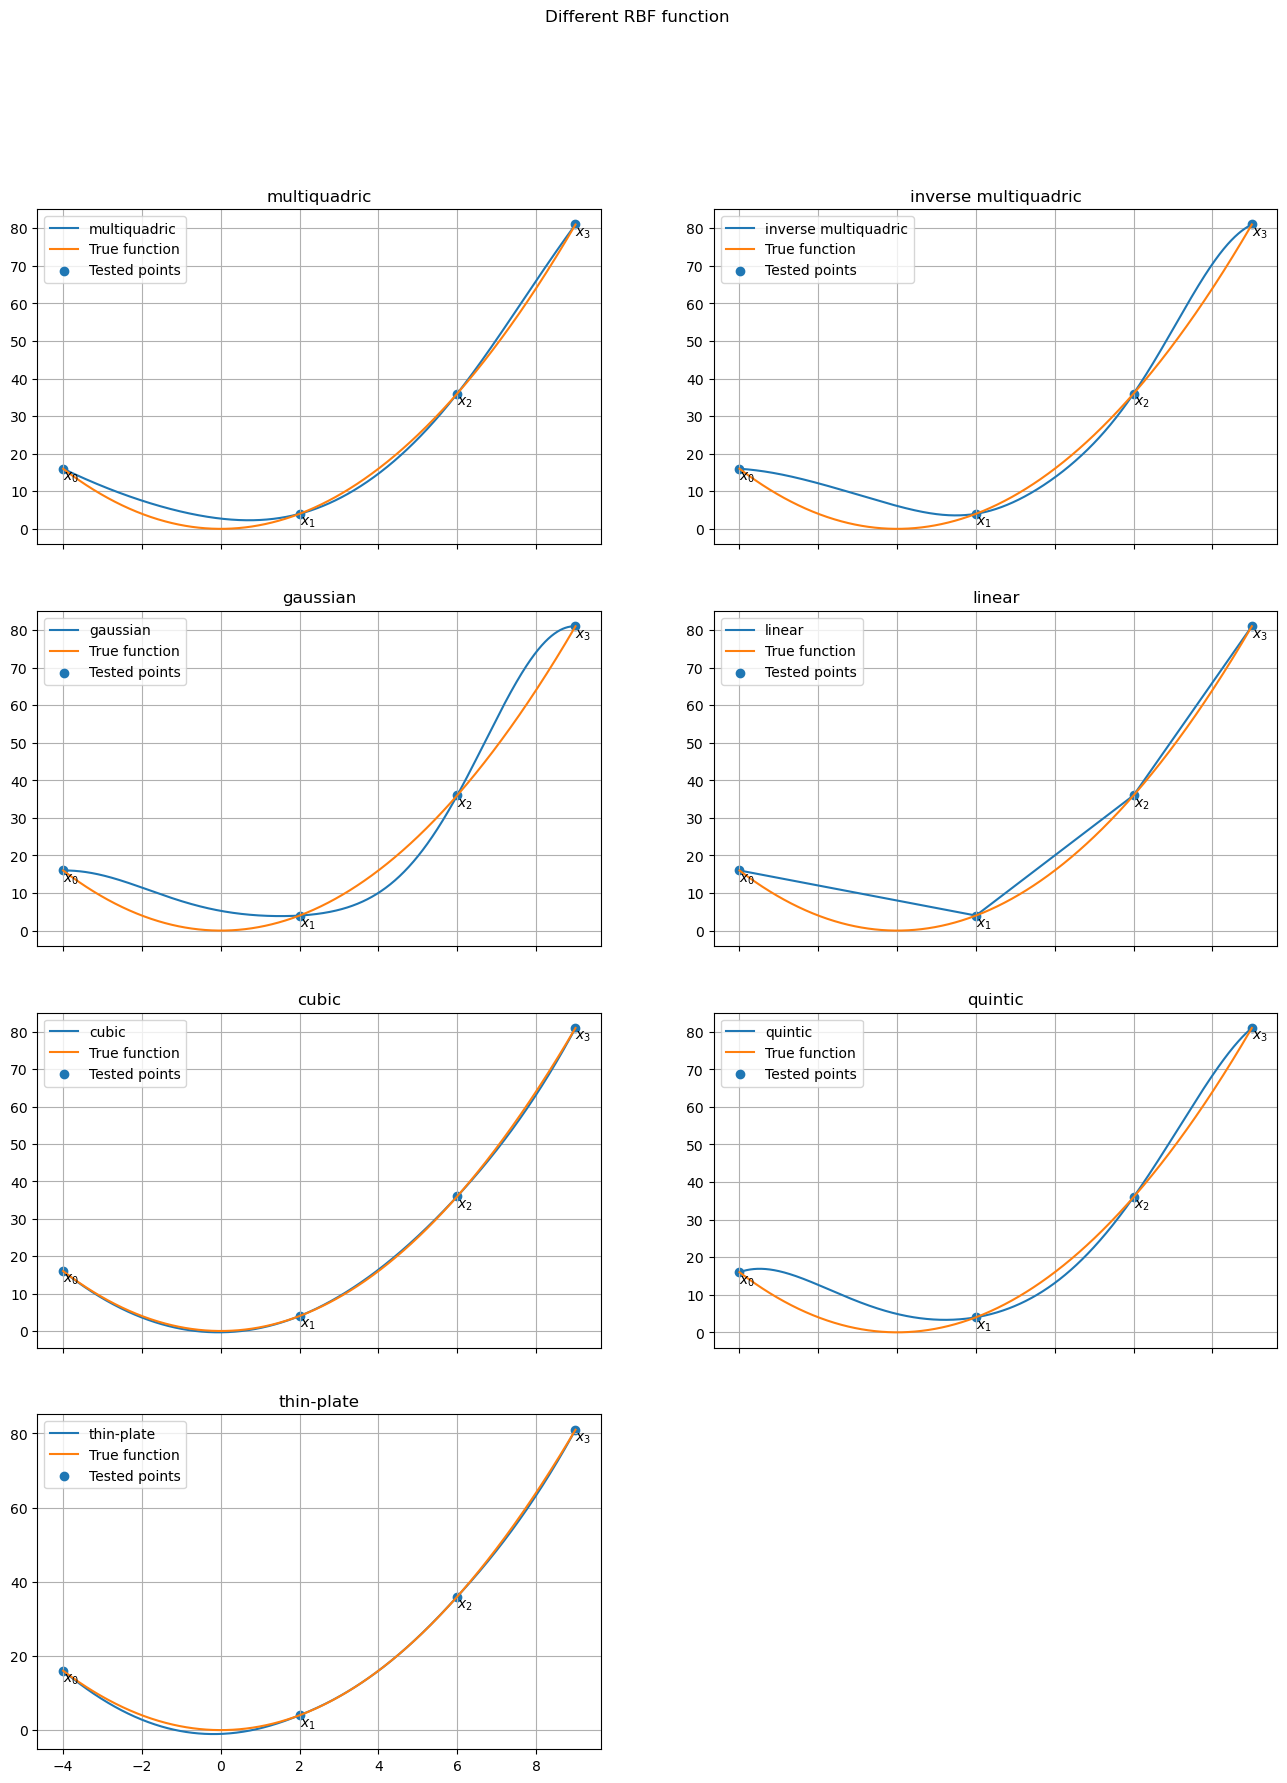

In [25]:
n = len(types)
max_width = 2 ##images per row
height, width = n//max_width +1, max_width
fig, axs = plt.subplots(height, width, sharex=True, figsize=(16, 20))
fig.suptitle("Different RBF function")  

x_test = np.linspace(min(tested_points),max(tested_points),1000)


for i in range(len(types)):
    f_rbf = interpolate.Rbf(x,y,function=types[i])
    y_test = f_rbf(x_test)
    ax = axs.flat[i]
    ax.plot(x_test,
            y_test, 
            label=types[i])
    ax.plot(x_test, func(x_test), label= "True function")
    ax.scatter(x, y, label="Tested points")
    idx=0
    for p in np.column_stack((x,y)):
        ax.text(p[0],p[1]-3, r'$x_{}$'.format(idx))
        idx+=1
    ax.legend()
    ax.set_title(types[i])  
    
    ax.grid()

for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj


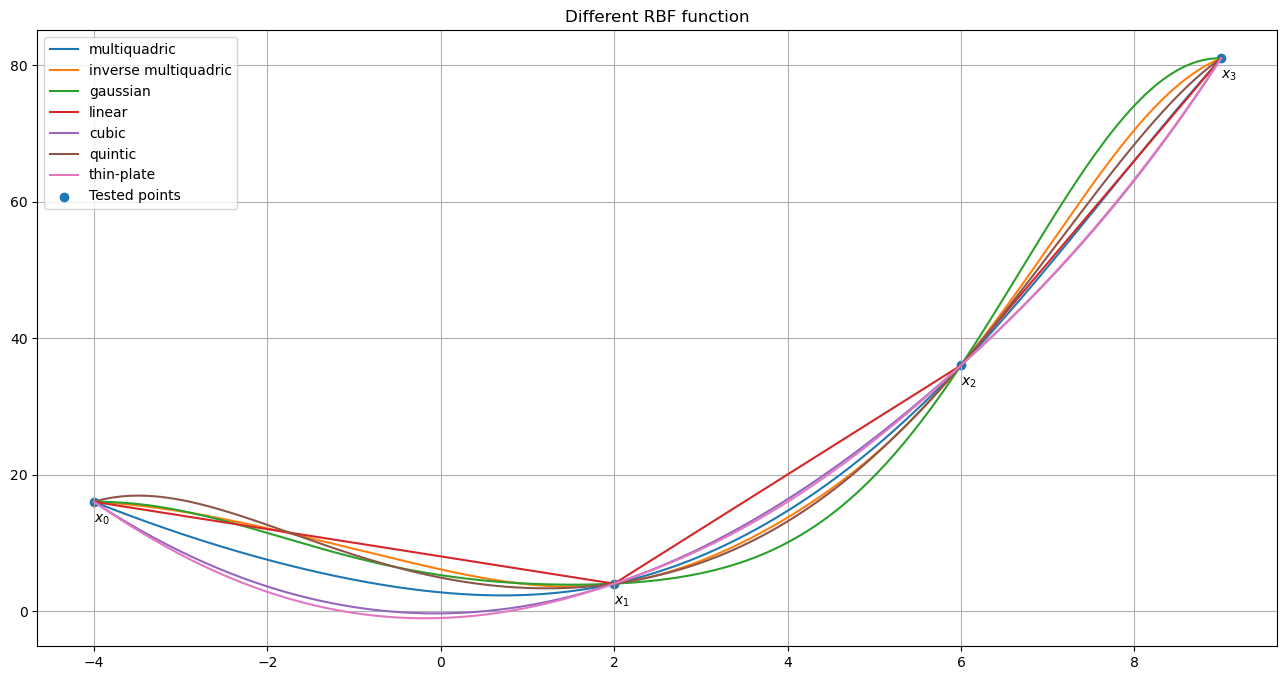

In [28]:
fig, axs = plt.subplots( figsize=(16, 8))
plt.title("Different RBF function")

for i in range(len(types)):
    f_rbf = interpolate.Rbf(x,y,function=types[i])
    y_test = f_rbf(x_test)
    plt.plot(x_test,
            y_test, 
            label=types[i])
plt.scatter(x, y, label="Tested points")  

idx=0
for p in np.column_stack((x,y)):
    plt.text(p[0],p[1]-3, r'$x_{}$'.format(idx))
    idx+=1

plt.grid()
    
plt.legend()

## 1.4. Question A $l_1$
* Which is the best RBF function? Try to answer (max 2 lines)


## Solution
It is not possible to determine the best RBF function. This varies depending on the problem to be interpolated.

## 1.5. Question B $l_2$
* Do you think there are techniques to establish the best rbf function to use? If so, which one? (max 5 lines)

## Solution
Cross validation can be an excellent technique for choosing the most suitable RBF function.

## 1.6. Create an explorative function $l_2$
Create an explorative function that receives as input an array of point and returns 0 if the point has already been tested, while the further you move away from the tested points, the higher the value of the function will be.

Example
tested_points=[2,3,4,7,9] <br>
d = np.linspace(0,10,1000) <br>
y_idw = idw_function(tested_points,d)<br>
plot(d,y_idw)<br>

![alt text](idw.pdf "Title")

## Solution

In [29]:
from numpy import linalg as LA

In [30]:
def idw(tested_points, x):
    X = tested_points.reshape(-1,1)
    (N, n) = np.shape(X)
    x = np.reshape(x, (-1, 1))
    nx = len(x)
    den = np.zeros(nx)
    z = np.zeros(nx)
    for ind in range(nx):
        xx = x[ind:ind + 1, :]
        if np.sum(np.sum(xx == X, axis=1) >= n) >= 1:  # se la x che provo appartiene ai samples
            z[ind] = 0
        else:
            e = LA.norm(xx - X, axis=1) ** 2  # sono i pesi calcolati come in beporad pag 3, (3a)
            z[ind] = np.arctan(1 / sum(1 / e)) * 2 / np.pi
    return z

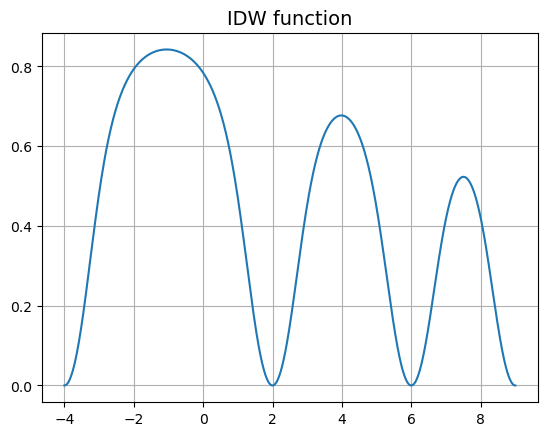

In [31]:
util_plot(lines=[np.column_stack((x_test, idw(np.array(tested_points),x_test)))], title="IDW function")

## 1.7 Create an acquisition function $l_1$
To recap, the acquition function $a$ is the combination of the surrogate function and the explorative function. In other words: <br>
$a =\hat{f}(x) + \delta idw(x)$ <br>

Where:
* $\hat{f}(x)$: is the interpolated function
* $\delta$: is the explorative parameter
* $idw(x)$: is the explotation function

In [43]:

# create an rbf interpolation function
f_rbf = interpolate.Rbf(x,y,function=types[i])
# surrogate value
f_rbf_y = f_rbf(x_test)
# idw value
idw_y = idw(np.array(tested_points),x_test)
# declare explorative factor
delta = 10
# acquisition function
acquisition_y = f_rbf_y - delta * idw_y

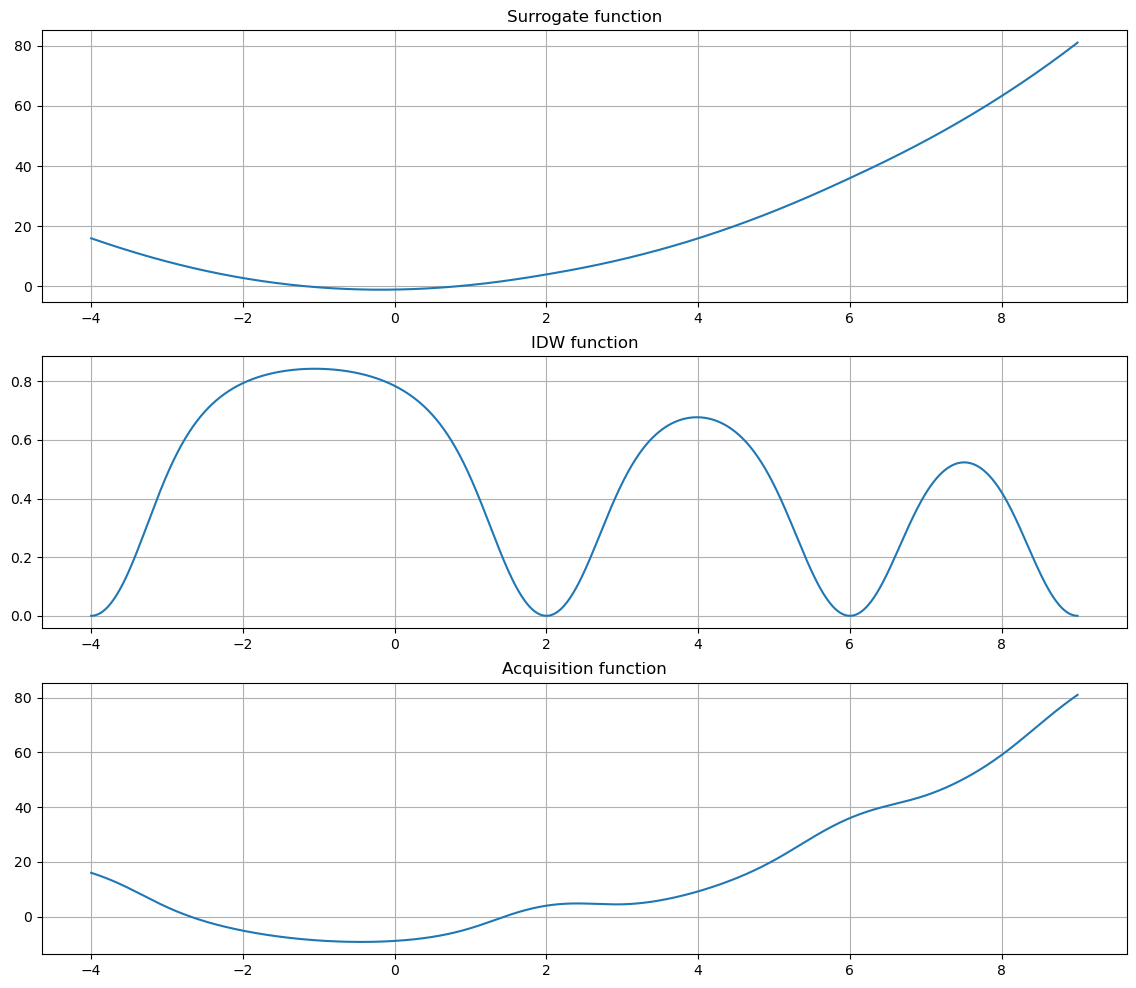

In [44]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(14, 12))
ax1.set_title("Surrogate function")
ax1.plot(x_test,f_rbf_y)
ax2.set_title("IDW function")
ax2.plot(x_test, idw_y)
ax3.set_title("Acquisition function")
ax3.plot(x_test, acquisition_y)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()

## 1.8 Find the next value to be tested from the acquisition function $l_1$
To recap, the next point to be tested is calculated by minimizing or maximizing (dependes on the problem) the acquisition function.

## Solution

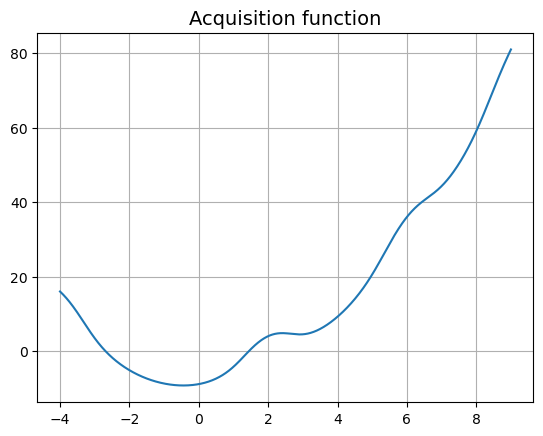

In [47]:
util_plot(lines=[np.column_stack((x_test, acquisition_y))], title="Acquisition function")

We can simply minimize this function using np.

In [49]:
idx_min= np.argmin(acquisition_y)

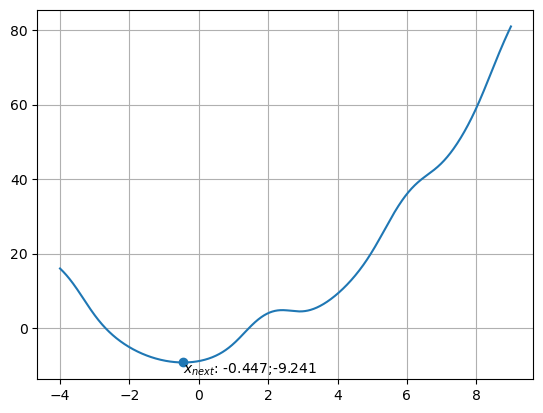

In [69]:
fig, ax = plt.subplots()
plt.plot(x_test,acquisition_y)
plt.scatter(x_test[idx_min],acquisition_y[idx_min], marker='o')
plt.text(x_test[idx_min],acquisition_y[idx_min]-3, r'$x_{}$: {};{}'.format('{next}',round(x_test[idx_min],3),round(acquisition_y[idx_min],3)))
plt.grid()
plt.show()